# Lab: Trees

Lab associated with Module: Trees

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/tmp/ipykernel_26783/1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [2]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [4]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

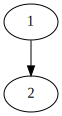

In [5]:
dot

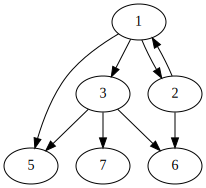

In [6]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [7]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.parent = None
        self.balance = 0


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    root.balance = (end - middle)-(middle - start)  
    
    return root

In [8]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [9]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)
print(test1_tree.balance)

1


We will make the simpler assumption that all the keys are unique when we are inserting

In [10]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [11]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [12]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

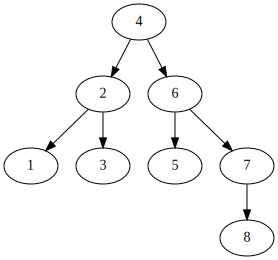

In [13]:
dot = visualize_tree(test1_tree)

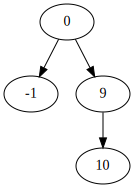

In [14]:
dot = visualize_tree(test2_tree)

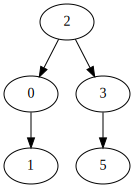

In [15]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [16]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [17]:
search(test3_tree, 3)

True

In [18]:
search(test1_tree, 18)

False

Let us write insert function now:

In [19]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            nodes.balance -= 1
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            nodes.balance += 1
            return

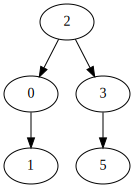

In [20]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

In [21]:
print(test3_tree.balance)

0


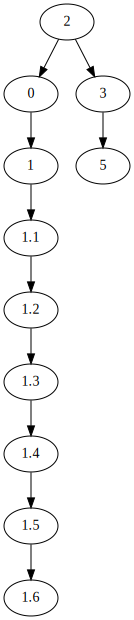

-6


In [22]:
insert(test3_tree, 1.1)
insert(test3_tree, 1.2)
insert(test3_tree, 1.3)
insert(test3_tree, 1.4)
insert(test3_tree, 1.5)
insert(test3_tree, 1.6)
dot = visualize_tree(test3_tree)
print(test3_tree.balance)

Let us write delete opertion. We will write another function minValueNode as well.

In [23]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)
        nodes.balance += 1

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)
        nodes.balance -=1

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        nodes.balance -=1
        
    return nodes

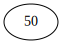

In [24]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

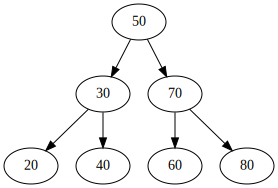

In [25]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

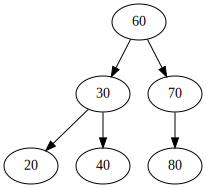

-1


In [26]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)
print(test3_tree.balance)

In [27]:
print(test3_tree.balance)

-1


***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

## Question 1

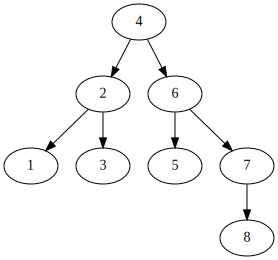

In [28]:
my_tree = test1_tree
dot = visualize_tree(my_tree)

In [29]:
print(my_tree.balance)

1


In [30]:
def BalanceCheck(node):
    return (abs(node.balance) < 2)

In [31]:
print(BalanceCheck(test3_tree))

True


# 2

In [32]:
def pathNode(node1, val1, path):

    if node1 == None:  
        return node1
    if val1 < node1.val:
        path.append(node1.val)
        pathNode(node1.left, val1,path)
    elif val1 > node1.val:
        path.append(node1.val)
        pathNode(node1.right, val1,path)
    elif val1==node1.val:
        path.append(node1.val)
        return 1
    else: return 1


In [33]:
def comparePaths(tree, node1, node2):
    path1 = []
    path2= []

    pathNode(tree, node1, path1)
    pathNode(tree, node2, path2)

    if len(path1) <= len(path2):
        for i in range(len(path1)):
            if path1[i] == path2[i]:
                commonAncestor = path1[i]
    elif len(path2) < len(path1):
        for i in range(len(path2)):
            if path2[i] == path1[i]:
                commonAncestor = path2[i]
    return commonAncestor

In [34]:
comparePaths(my_tree, 5, 7)

6

# 3

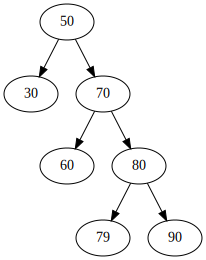

In [35]:
left_rotate = buildBinaryTree([50])
insert(left_rotate, 50)
insert(left_rotate, 30)
insert(left_rotate, 70)
insert(left_rotate, 60)
insert(left_rotate, 80)
insert(left_rotate, 79)
insert(left_rotate, 90)
dot = visualize_tree(left_rotate)

In [36]:
def getNode(nodes, val):
    if val == nodes.val:
            return nodes
    if val < nodes.val:   
        if nodes.left == None:
            return False
        return getNode(nodes.left, val)
    elif val >= nodes.val:
        if nodes.right == None:
            return False
        return getNode(nodes.right, val)

In [37]:
def leftRotation(tree, Pval):
    P = getNode(tree, Pval)
    T1 = P.left
    Q = P.right
    T2 = Q.left
    C = Q.right

    x = Node(Q.val)

    Q.left = T1
    Q.right = T2
    Q.val = P.val

    P.val = x.val
    P.left = Q
    P.right = C


    


In [38]:
leftRotation(left_rotate,50)

In [39]:
print(left_rotate.right.left.parent)

None


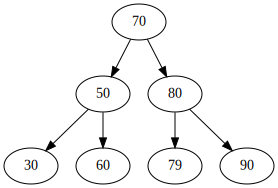

In [40]:
dot = visualize_tree(left_rotate)

In [41]:
def rightRotation(tree, Pval):
    P = getNode(tree, Pval)
    Q = P.left
    T4 = P.right
    C = Q.left
    T3 = Q.right

    x = Node(Q.val)

    Q.left = T3
    Q.right = T4
    Q.val = P.val

    P.val = x.val
    P.left = C
    P.right = Q

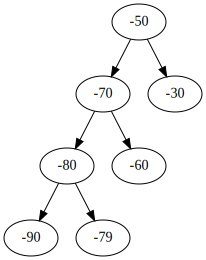

In [42]:
right_rotate = buildBinaryTree([-50])
insert(right_rotate, -50)
insert(right_rotate, -30)
insert(right_rotate, -70)
insert(right_rotate, -60)
insert(right_rotate, -80)
insert(right_rotate, -79)
insert(right_rotate, -90)
dot = visualize_tree(right_rotate)

In [43]:
rightRotation(right_rotate,-50)

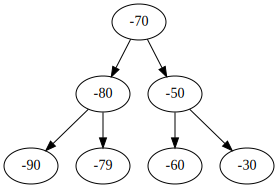

In [44]:
dot = visualize_tree(right_rotate)

In [45]:
def leftRightRotation(tree, Pval):
    
    P = getNode(tree, Pval)
    leftRotation(tree, P.left.val)
    rightRotation(tree, P.val)

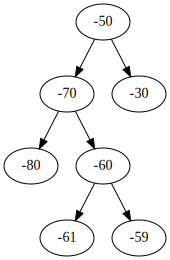

In [46]:
left_right_rotate = buildBinaryTree([-50])
insert(left_right_rotate, -50)
insert(left_right_rotate, -30)
insert(left_right_rotate, -70)
insert(left_right_rotate, -60)
insert(left_right_rotate, -59)
insert(left_right_rotate, -61)
insert(left_right_rotate, -80)

dot = visualize_tree(left_right_rotate)

In [47]:
leftRightRotation(left_right_rotate, -50)

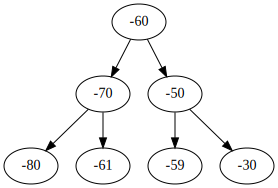

In [48]:
dot = visualize_tree(left_right_rotate)

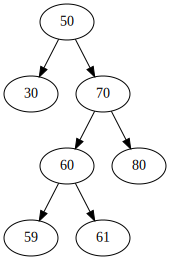

In [49]:
right_left_rotate = buildBinaryTree([50])
insert(right_left_rotate, 50)
insert(right_left_rotate, 30)
insert(right_left_rotate, 70)
insert(right_left_rotate, 60)
insert(right_left_rotate, 59)
insert(right_left_rotate, 61)
insert(right_left_rotate, 80)

dot = visualize_tree(right_left_rotate)

In [50]:
def rightLeftRotation(tree, Pval):
    
    P = getNode(tree, Pval)
    rightRotation(tree, P.right.val)
    leftRotation(tree, P.val)

In [51]:
rightLeftRotation(right_left_rotate, 50)

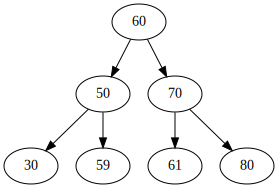

In [52]:
dot = visualize_tree(right_left_rotate)

***